Multiplicity - binomial

nCr - # of ways r things can be put in n slots. g(N,t) in kittel

binomial distribution variance $np(1-p)$



Microstate notation

$(\uparrow + \downarrow)$ or more generally $(p+q)^N = \sum_{n=0}^{N} {N\choose{n}} p^n q^{N-n}$ Probability of all outcomes

In [3]:
from math import comb
comb(4, 2) * .5**2*.5**2

0.375

Feynman trick $np^n = p \frac{\partial}{\partial p} \left( p^n \right)$

The important part: $\langle n^2 \rangle$

$$
\langle n^2 \rangle = \sum_{n=0}^N {N \choose n} n^2  p^n q^{N-n} = \left( p \frac{\delta}{\delta p} \right)^2 \sum_{n=0}^N {N \choose n}   p^n q^{N-n}
\\ = \left( p \frac{\delta}{\delta p} \right)^2 \left( p+ q\right)^N = pN + p^2 N(N-1) 
\\ = (Np)^2 + Npq
$$

$$
\langle (n-\langle n \rangle)^2 \rangle = \langle n^2 \rangle - \langle n \rangle^2 = (Np)^2 + Npq - (Np)^2 = Npq
$$
variance

Stirling approximation (it's pretty good) $\ln(N!) \approx \frac{1}{2} \ln(2\pi) + (N+\frac{1}{2}) \ln(N) - N$

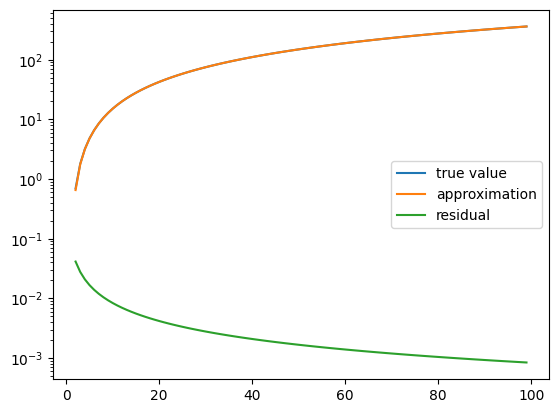

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, log
from scipy.special import factorial

N = np.arange(2, 100)
direct_calc = log(factorial(N))
approx_calc = 1/2 * log(2*pi) + (N+1/2)*log(N) - N

plt.plot(N, direct_calc, label='true value')
plt.plot(N, approx_calc, label='approximation')
plt.plot(N, direct_calc-approx_calc, label='residual')
plt.yscale('log')
plt.legend();

g multiplicity

$$
g(N,s) = \frac{N!}{(N-s)! s!} = \frac{N!}{N_A! N_B!} \\
g(N,s) \approx g(N,0) e^{-2s^2/N} \\ g(N,0) \approx \sqrt{\frac{2}{\pi N}} 2^N \\
g(N,s) = \sum_{s_1} g_1 (N_1,s_1) g_2 ( N_2, s-s_2) \\
g(N,U) = \sum_{U_1} g_1 (N_1,U_1) g_2 (N_2, U_2),\ U = U_1 + U_2
$$

Total energy is conserved $\checkmark$

$g_1 g_2$

Thermal equilibrium is when $g_1g_2$ is maximized

$$
d(g_1,g_2) = 
\left(\frac{\partial(g_1,g_2)}{\partial U_1} \right)_{N_1, N_2} dU_1 + 
\left(\frac{\partial(g_1,g_2)}{\partial U_2} \right)_{N_1, N_2} dU_2 \\
=
g_2 \frac{\partial g_1}{\partial U_1} dU_1 + g_1\frac{\partial g_2}{\partial U_2} dU_2
$$

The little $N_1,N_2$ indicate these values are held constant

When is $d(g_1, g_2)$ minimized? Let's separate

$$
\frac{1}{g_1} \frac{\partial g_1}{\partial U_1} - \frac{1}{g_2} \frac{\partial g_2}{\partial U_2} = 0 \\
\frac{\partial \ln(g_1)}{\partial U_1} =\frac{\partial \ln(g_2)}{\partial U_2}\\
\frac{1}{\tau_1} = \frac{1}{\tau_2}
$$
temperature achieved

Next: entropy (also just dropped in our lap for now)

$$
\sigma(N,U) = \ln g(N,U)
$$

Entropy $\sigma$ is unitless. Note that fundamental temperature $\tau$ has energy units since $g$ is unitless. $\tau = K_B T$

We translate from $\sigma$ to $S$ using $S = K_B \sigma$

Bonus: $\tau = \frac{\partial U}{\partial \sigma}_N$ Not common.

More common: $\frac{1}{\tau} = \frac{\partial \sigma}{\partial U}_N$

This definition mean cold systems change entropy quickly, while hot systems change entropy slowly with respect to energy

----

Entropy

$g_{tot} = g_1 g_2$ but $\sigma_{tot} = \sigma_1 + \sigma_2$ Entropy adds.

In practice we can't say as much when we're out of equilibrium.

$$
\sigma_{tot} = \ln(g_{tot}) = \ln\left(\sum_{U_1} g_1 g_2\right)
$$

If one state is much bigger than the rest, we can focus on that one
$$
\sigma_{tot} \approx \ln(\hat g_1 \hat g_2) \approx \ln(\hat g_1) + \ln(\hat g_2) = \sigma_1^{eq} + \sigma_2^{eq}
$$

We can use entropy to describe heat flow

$$
d \sigma_{tot} = d \sigma_1 + d \sigma_2 \\
= \frac{\partial \sigma_1}{\partial U_1 } \delta U_1 + \frac{\partial \sigma_2}{\partial U_2 } \delta U_2 \\
$$
Note that $\delta U_2 = -\delta U_1 $
$$
d \sigma_{tot} =\left(\frac{1}{\tau_1} - \frac{1}{\tau_2} \right) \delta U_1
$$

So entropy increases if heat flows from hot to cold, decreases if opposite

Laws (not postulates) of thermodynamics

0. If a and b are in equilibrium with c, they are in equilibrium
1. Heat = Energy kinda
2. If a state changes, entropy with stay constant/increase (usually)
3. It definitely stays the same

---

Thermal contact & reservior

If we have a reservoir R with temp $\tau$ and total energy $U-\epsilon_s$ in contact with our system $S$ with energy $\epsilon_s$, probably the same temperature?

How likely is $S$ in state $s$ with energy $\epsilon_s$?

$$
g_R(U_0 - \epsilon_s) \times 1 = g_{tot} \\
P(\epsilon_s) \propto g_R(U-\epsilon_s)
$$
Great all we need is $g_R$ as a function of energy. We'll get there.

Acutally, we're going to pull the $\epsilon_s$ out of this.
<details>

$$
\ln(g_R(U_0)-\epsilon_s) \approx \ln(g_R (U_0)) - \epsilon_s \left(\frac{\partial \ln g(U)}{\partial U} \right)_{V,N} + \dots \\
\approx \ln(g_R(U_0)) - \epsilon_s\frac{1}{\tau} \\
$$
Going back up via exponentiation gives us our final result
</details>

$$
g_R(U-\epsilon_s) \approx g_R(U) e^{-\epsilon_s/\tau} \\
P(\epsilon_s) \propto e^{-\epsilon_s/\tau}
$$



$$
\tau = \frac{1}{40} \\
E_1 = -13.6 \\
E_2 = -3.4 \\

% 40 = \frac{d \sigma}{d U} \\
% \sigma(U) = 40U \\
% \ln(g(U)) = 40U \\
% g(U) = e^{40U} \\
$$



In [7]:
from numpy import exp
print(exp(3.4*40) / exp(13.6*40))

6.424678257926741e-178


---
Partition function

$$
Z = \sum_{s'} e^{-\epsilon_s'/T} \\
\langle X \rangle \equiv \sum_s X_s P(s) = \frac{\sum_s X_s e^{-\epsilon_s/T}}{Z} \\
\langle \epsilon \rangle \equiv \mathcal{U} %yippie 
$$
Apply derivative
$$
\mathcal{U}  = \dfrac{\tau^2 \frac{\partial}{\partial \tau} \sum_s e^{-\epsilon_s/\tau}}{Z} = \tau^2 \dfrac{\partial \ln Z}{\partial\tau} \\
\beta \equiv \frac{1}{\tau} \rightarrow \mathcal{U} = - \frac{\partial \ln Z}{\partial \beta}
$$

Okay, how do we find the fluxuations (std)?

$$
\langle \epsilon^2 \rangle = \frac{\frac{\partial^2 Z}{\partial \beta^2}}{Z} \\
\langle (\Delta \epsilon)^2 \rangle = \frac{1}{Z} \frac{\partial^2 Z}{\partial \beta^2} - \left(\frac{d \ln Z}{\partial \beta} \right)^2 = \frac{\partial^2 \ln Z}{\partial \beta^2}
$$

Microcanonical ensemble: 

multiplicity of $g(U,V,N)$ is probability of a quantum state <br>
$\sigma(U,N,V) = \ln(g)$ <br>
$\beta = \frac{\partial \sigma}{\partial U}_{N,V}$

Requires constant particles

Canonical ensemble: 

$Z = \sum_s e^{-\epsilon_s/\tau}$<br>
$P(s) = \frac{e^{-\epsilon_s \beta}}{Z}$ <br>
$\mathcal U = - \frac{\partial \ln Z}{\partial \beta}$ <br>

Requires that we're in contact with a thermal reservior

Grand Canonical ensemble:

$?$

Particles can change

---
Extensive qantities scale with size (total energy), intensive dosen't scale (avg energy). A reversible process occurs when system remains at equilibrium throughout the process.

Reversible processes transform states, they do not move particles between states. Quantized energy levels should smoothly transfom to neq energy levels

---

# Pressure

So far: constant N, V. Now we'll vary V (reversibly) (change state properties but stay in the same state)

Microcanonical
$$
\epsilon_s(V-\Delta V) = \epsilon_s(V) - \frac{\partial \epsilon_s}{\partial V} \Delta V \\
\Delta \epsilon_s = - \frac{\partial \epsilon_s}{\partial V}  \Delta V \\
W = p_s \Delta V = \Delta \epsilon_s 
$$
So we can have energy change, but entropy actually stays the same. This makes sense since we're reversible
$$
p_s = -\frac{\partial \epsilon_s}{\partial V} \\
\langle p_s \rangle = -\frac{\partial U}{\partial V}_{N,\sigma} \\
$$

Now $\sigma$ is independent instead of dependent. We can flip our $1/\tau$

$$
\tau = \frac{\partial U}{\partial \sigma} \\
d U = \frac{\partial U}{\partial \sigma} _{V,N} d\sigma + \frac{\partial U}{V}_{\sigma,N} dV + \frac{\partial U}{\partial N}_{\sigma,V} dN \\
dU = \tau dS + pdV + 0
$$


Let's put some particles in boxes.


Work is done ~by~ the system

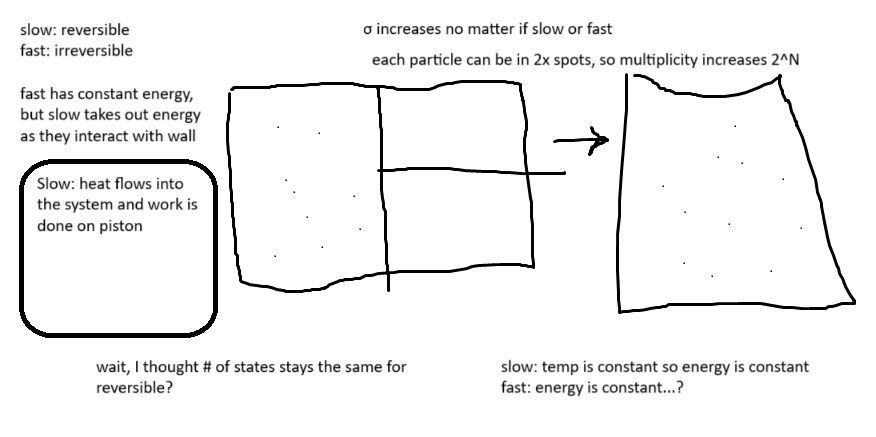

---

# Helmholtz free energy

related to gibbs?

This is a maxwell relation:
$$
\frac{\partial \tau}{\partial V}_\sigma = - \frac{\partial p}{\partial \sigma}_V
$$

How did we get here?

$$
\frac{\partial \tau}{\partial V} = \frac{\partial^2 U}{\partial V \partial \sigma} \\ 
\frac{\partial }{\partial \sigma} = - \frac{\partial^2 U}{\partial \sigma \partial V} \\
\tau = \frac{\partial U}{\partial \sigma}_{V,n} \\
P = - \frac{\partial U}{\partial V}_{\sigma, N} 
$$
Mix 'em all toghether

Helmholtz: $F(\tau, V)  \equiv U - \tau \sigma$

$$
dU = \tau d\sigma - PdV \\
= \tau d\sigma + \sigma d\tau - \sigma d\tau - pdV \\
= d(\tau \sigma) - \sigma d\tau - pdV 
$$
$$
d(U-\tau \sigma) = -\sigma d\tau - p dV \\
dF = -\sigma d\tau - pdV \\
= \frac{\partial F}{\partial \tau} d\tau + \frac{\partial F}{\partial V} dV \\
$$

$$
\sigma = -\frac{\partial F}{\partial \tau} \\
P = -\frac{\partial F}{\partial V}
$$


Why is $F$ so important? It relates to $Z$

$$
\sigma = \frac{\partial}{\partial \tau} \tau \ln Z = - \frac{\partial F}{\partial \tau} \\
-\int \sigma = -\tau \ln Z + c(V) = F\\
F = -\tau \ln Z

$$

We can translate from quantum mechanics to stat mech now.

$$
Z = e^{-F/\tau} \\
P(\epsilon_s) = \frac{e^{-\epsilon_s/\tau}}{Z} = e^{\frac{F-\epsilon_s}\tau}
$$

Alright, lets get cannonical

$$
\sigma_{R+S} = \sigma_R + \sigma_S \\
= \sigma_R(U_0 - U_s) + \sigma_S(U_s) \\
\approx \sigma_R(U_0) - \frac{\partial \sigma_R}{\partial U}U_S + \sigma_s (U_s) \\
= \sigma_R(U_0) - \frac{1}{\tau} U_S + \sigma_s(U_s) \\
= \sigma_R (U_0) - \frac{1}{\tau} (U_s - \tau \sigma_s(U_s)) \\
= \sigma_R(U_0) - \frac{F_s}{\tau} \text{ nice!}
$$

---
Oops I missed a bit (so did the professor)

$$
\ln g \equiv \sigma = \ln Z + \frac{\mathcal U}{\tau} \\
\mathcal U = \tau^2 \frac{\partial \ln Z}{\partial \tau} \\

\sigma = \ln Z + \tau \frac{\partial \ln Z}{\partial \tau} \\
= \frac{\partial}{\partial \tau} \left( \tau \ln Z \right)
$$

EM waves

Similar to QHO: $\langle s \rangle = \frac{1}{e^{\hbar \omega/\tau}-1}$

Perfectly conducting box: $E_{\parallel}=0$ and inside $\frac{\partial^2 \vec E}{\partial t^2} - c^2 \nabla^2 \vec E = 0, \vec \nabla \cdot \vec E = 0$

Solution:

$$
E_x = E_{x0} \sin(\omega t) \cos(n_x \pi x/L) \sin(n_y \pi) y/L) \sin(n_z \pi z/L) \\ 
E_y = E_{x0} \sin(\omega t) \sin(n_x \pi x/L) \cos(n_y \pi) y/L) \sin(n_z \pi z/L) \\
E_z = E_{x0} \sin(\omega t) \sin(n_x \pi x/L) \sin(n_y \pi) y/L) \cos(n_z \pi z/L)
$$
Sines and cosines? kinda looks like an oscillator.

The modes of an EM wave are $(n_x,n_y,n_z)$, with $n=\sqrt{n_x^2+n_y^2+n_z^2}$, with two different polarizations

According to equipartition theorem, energy goes way off (Rayleigh-Jeans explosion). There is a high density (infinite) of high-frequency modes, which equipartition cannot handle.

Plack invented quantum physics: only discrete energies are allowed. Complete guess needed to solve disaster.

$$
\mathcal U = 2 \sum_n \frac{\hbar \omega_n}{e^{\hbar \omega/\tau}-1}
$$

$$
\sum_n \rightarrow \int_0^\infty dn_x \int_0^\infty dn_y \int_0^\infty dn_z = \frac{1}{8} \int 4\pi n^2 dn
$$
1/8 for spherical symmetry

$$
\mathcal U \rightarrow \pi \int_0^\infty dn n^2 \frac{\hbar \omega_n}{e^{\hbar \omega n /\tau}-1}
$$

$$
\mathcal U \overset{ \omega_n = n\pi c/L,\ x\equiv \pi \hbar cn/L\tau } \rightarrow
\frac{\pi^2 L^3}{15 \hbar^3 c^3}\tau^4
$$

---


# Ideal Gas

Concentration: $n_Q \equiv \left(\frac{m\tau}{2\pi\hbar^2}\right)^{3/2}$

With one ideal gas molecule, we have

$Z_1 = n_a V = \frac{n_Q}{n}$. Remember the partition function $Z$ gives us our state probabilities and $\mathcal U(\tau)$

Before QM, we tried $Z_n = (Z_1)^N$, which gets the correct energy but the __wrong entropy__  

QM particles have this neat trick where we can't tell if two particles are different.

Thus we can rearrange all terms $N!$ (classical regieme, particles are in different wavefunctions) <br>
$Z_n = \frac{Z_1^N}{N!}$

Results:
$$
\ln Z_n = N \ln \left( \frac{n_Q}{n} + n \right) \\
\mathcal U = N \tau^2 \frac{\partial}{\partial \tau} \left( \frac{3}{2} \ln \tau \right)= \frac{3}{2} N \tau \\
F = -\tau \ln Z_n = -\tau N \ln\left( \frac{n_Q}{n}\right) - \tau N \\
p = -\frac{\partial F}{\partial V}_{\tau,N} = \tau N \frac{\partial}{\partial V} \ln(V/N)  = \frac{\tau N}{V} \\
pV = N k_B T \\ 
\sigma = N \left( \ln\left(\frac{n_Q}n\right) - \frac{5}2 \right)
$$

Remember we're not really interacting right now $n<<n_Q$, which helps prevent quantum effects

The Grand Canonical Ensemble: chemical potential



Chemical potential 1: $\mu$
$$
\mu ( \tau, V, N) \equiv \left( \frac{\partial F}{\partial N} \right)_{\tau,V} \\
$$
There is an internal chemical potential of the particles, as well as an external potential that can be applied. Consider ions with a voltage.
$$
\mu_{\text{tot}} \equiv \mu \equiv \mu_{\text{int}} + \mu_{\text{ext}} \\
F_1 = \mathcal U_1 - \tau \sigma_1 \text{ made by } N_1 q\Delta V
$$

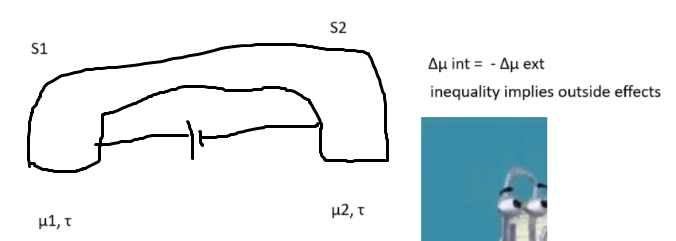

Any external energy (potential?) can be stuck int $\mu$

$$
\mu_{\text{ext}}(h) = mgh \\
\tau \ln\left(\frac{n(0)}{n_a}\right) = \tau \ln \left( \frac{n(h)}{n_Q}\right) + mgh \\
p(h) = p(0) e^{-mgh/\tau}
$$

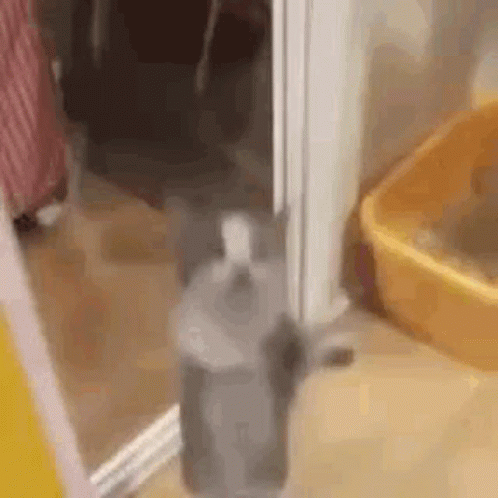
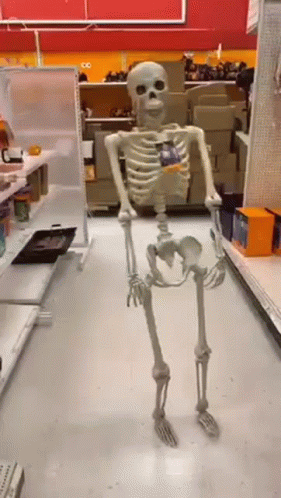

The generalized theromdynamic identity

$$
F = U - \tau \sigma \rightarrow dF = -\sigma d\tau 0 pdV + \left( \frac{\partial F}{\partial N} \right)_{\tau,V} dN \\
dU = \tau d\sigma - pdV + \mu dN
$$

From the gti, we can make our other equations 
$$
\mu = \frac{\partial U}{\partial N}_{\sigma,V} \\
\mu = - \tau \frac{\partial \sigma}{\partial N}_{U,V}
$$

| Ensemble | Independent Variables | we calculate | derive |
| --- | --- | --- | --- |
| Microcanonical (isolated) | $U, V, N$ | $g(U,V,N) \\ \sigma = \ln g$ | $\frac{1}{\tau} = \frac{\partial \sigma}{\partial U}_{V,N} \\ \frac{p}{\tau} = \frac{\partial \sigma}{\partial V}_{U,N} $ 
| Canonical (thermal equilibrium) | $\tau, V, N$ | $Z = \sum_s e^{-\epsilon_s/\tau} \\ F = -\tau \ln Z \\ U = F+\sigma \tau $ | $\sigma = -\frac{\partial F}{\partial \tau}_{V,N} \\ p = -\frac{\partial F}{\partial V}_{\tau, N} \\ \mu = \frac{\partial F}{\partial N}_{\tau, V}$
|Grand Canonical Ensemble | $\tau, V, \mu$ | | |



$$
P(N, \epsilon_s) \propto g(R) g(S) = g_R ( N_0 - N, U_0-\epsilon_s) \\
P\propto e^{\sigma(N_0 - N, U_0 - \epsilon_s)}
$$
Lets taylor expand!

$$
\sigma(N_0-N, U_0 - \epsilon_s) \approx \sigma(N_0, U_0) - \left(\frac{\partial \sigma}{\partial N_0} \right)_{U_0} N - \left(\frac{\partial \sigma}{\partial U_0}\right)_{N_0} \epsilon_s \\
\sim \frac{\mu N}{\tau} - \frac{\epsilon_s}{\tau}
$$
Gibbs factor acquired!
$$
P \propto e^{(\mu N - \epsilon_s)/\tau}
$$
Be carful, $\mu N$ may depend on $s$, just like $\epsilon_s$

The grand partition function (should be similar) $P(N, \epsilon_s) = \frac{e^{(\mu N - \epsilon_s) /\tau}}{\sum_{N'}\sum_{S'(N') e^{(N'\mu - \epsilon_s'/\tau)}}}$

$\mathcal z \mathcal Z \zeta \Zeta \mathscr Z$

---

It's been a while so pay attention

# Degenerate Gasses

Previously we found a better ideal gas using fermi/bose gasses with $n \ll n_Q$

Now, we'll use $n \gtrsim n_Q = \left( \frac{M\tau}{2\pi \hbar^2}\right)^{3/2}$

$$
\mathcal f_{FD} (\epsilon) = \frac{1}{e^{\frac{\epsilon-\mu}{\tau}}+1}
$$

This degenerate gas appears when $\tau \lesssim \left(\frac{2\pi \hbar^2}{M} \right) n^{2/3}$

The most quantum ($\tau=0$) starts to give us fermi energy stuff



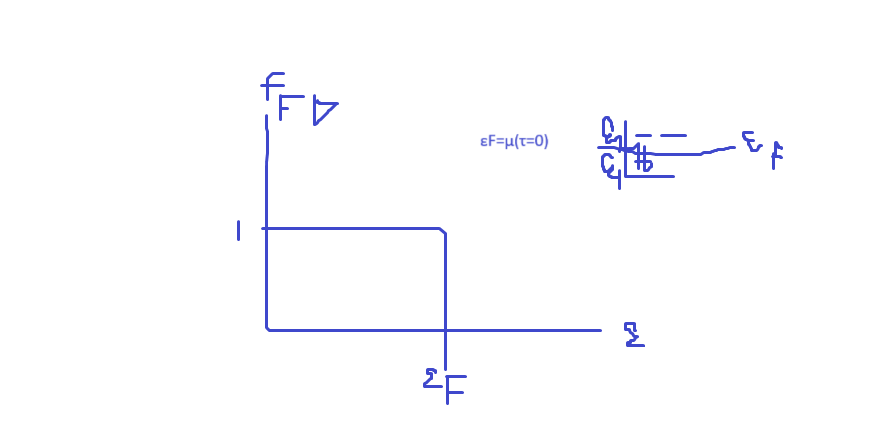

$$
N = \sum_{\text{orbitals}} f(\epsilon)
$$
True for any temperature, including $\tau = 0$ (where fermi energy is simple). Same magic as using $\mu = \mu$

Let's loop through the orbitals. Fermions (spins):

$$
2\sum_{n_x,n_y,n_z} f(\epsilon_{n_x,n_y,n_z}) = \frac{2}{8} \cdot 4\pi \int dn n^2 f(\epsilon_n)
$$
For 2D:
$$
\frac{2}{4} \cdot 2\pi \int dn n f(\epsilon_n)
$$

$$
N = \pi \int_0^{n_F} dn n^2 \rightarrow n_F\text{ attains }\epsilon_F \\
= \frac{1}{3} \pi n_F^3 
$$
Result: $n_F = \left( \frac{3N}{\pi} \right)^{1/3} $

This gives us $\epsilon_F$

$$
\epsilon_n = \frac{\hbar^2 \pi^2}{2ML^2} n^2 \\
\epsilon_F = \frac{\hbar^2}{2M} \left( \frac{3N\pi^2}{L^3} \right)^{2/3} = \frac{\hbar^2}{2M} \left( 3\pi^2 n\right)^{2/3} \equiv \tau_F \\
n = \frac{N}{L^3}
$$

The new $n$ is concentration, overdefining $n$ but we'll live.

For a chunk of copper or something we can find fermi temperature in terms of real world values

$$
\tau = k_B T \\
\frac{\tau_F}{k_B} \sim 5\times 10^4 K
$$

Thus we live in the quantum world with solids like metal.

Energy in Fermi-bose distributions:

$$
U_0 = \sum_{\text{orbitals}} \epsilon f(\epsilon, \tau=0) \\
= \pi \int dn n^2 \epsilon_n f(\epsilon_n) \\
\epsilon_n = \epsilon_F \frac{n^2}{n^2_F} \\
U_0 = \frac{\pi \epsilon_F }{n_F^2}\int_0^{n_F} n^4 dn \\
= \frac{3}{5} N\epsilon_F 
$$

Questions!

-> Energy of levels comes from what force? Electrostatic?

-> Review metrics

-> $\epsilon_F$ vs $\epsilon_0$ vs $U_0$

-> Honors project ofc

-> (maybe) fermi diagrams in general?


---

## Density of States

Degenerate 3D electron gas. Average of value $X$ is

$$
\langle x \rangle = \sum_0^\infty X(\epsilon) D(\epsilon) f(\epsilon) d\epsilon
$$

Density of states is the rate of change of available states as energy increases

$$
D(\epsilon) = \frac{\pi}{2} \left( \frac{n_F^2}{\epsilon_F}\right)^{3/2} \sqrt{\epsilon}
$$

Let's see if we can make this into $C_V$? Remember $f$ describes the energy of possible states.

$$
U(\tau) = \int_0^\infty \epsilon D(\epsilon) f(\epsilon) d\epsilon \\
C_{el} = \frac{\partial U}{\partial \tau}_{V,N} = \int_0^\infty \epsilon D(\epsilon) \frac{\partial f}{\partial \tau} d\epsilon \\
f = \frac{1}{e^\frac{\epsilon-\mu}{\tau}+1}
$$
BUT! $\mu$ depends on tau? Well, we do have constant $N$ 
$$
0 = \frac{\partial N}{\partial \tau} = \frac{\partial}{\partial \tau} \int_0^\infty D(\epsilon) f(\epsilon) d\epsilon = \int_0^\infty D(\epsilon) \frac{\partial f(\epsilon)}{\partial \tau} d\epsilon 
$$
We're going to jamb this in for some unknown reason. I blame $c$

$$
C_{el} = \int_0^\infty \left(\epsilon-\epsilon_F\right) D(\epsilon) \frac{\partial f}{\partial \tau} d\epsilon \\
$$

Approximations:

$$
C_{el} \simeq D(\epsilon_F) \int_0^\infty (e-\epsilon_F)\frac{\partial f}{\partial \tau} d\epsilon \\
\mu \approx \epsilon_F \\
\frac{\partial f}{\partial \tau} \approx \frac{\epsilon - \epsilon_F}{\tau} \frac{e^\frac{\epsilon-\epsilon_F}{\tau}}{\left(e^{\frac{\epsilon-\epsilon_F}{\tau}}+1\right)^2}
$$
Using $x= \frac{\epsilon - \epsilon_F}{\tau}$, this gives us

$$
C_{el} \simeq \tau D(\epsilon_F) \int_\frac{-\epsilon_F}{\tau}^{\infty} x^2 \frac{e^x}{\left(e^x+1\right)^2}dx
$$
Since we're approximating everything else, we might as well take care of that integral bound

$$
C_{el} \simeq \tau D(\epsilon_F) \int_{-\infty}^{\infty} x^2 \frac{e^x}{\left(e^x + 1 \right)^2} dx \\
= \frac{1}{3} \pi^2 \tau  D(\epsilon_F)  \\
= \frac{1}{2} \pi^2 N \left(\frac{\tau}{\tau_F}\right) \quad (\text{Note }\tau_F \equiv \epsilon_F)
$$
This comes from microscopic spin-statistics (a quantum thing) that is combined with our normal statistical models.

---

# Pressure

If $d\sigma$ is change in entropy at some $\tau$, then

$$
dQ = \tau d\sigma \\
dU = dQ + dW \\
$$
$dW$ work done on system (by reservoir)

Consider a reversible cyclic process / heat engine

1. $Q_h @ \tau_h \rightarrow \Delta \sigma > 0$
2. Do work $\Delta \sigma = 0$
3. Deposit heat into a new resivor at $\tau_l < \tau_h $

$$
\Delta \sigma_h = \frac{Q_h}{\tau_h} \\
\Delta \sigma_{\text{work}} = 0 \\
\Delta \sigma_l = \frac{Q_l}{\tau_l} \\
$$

This gives us our energy change
$$
\sigma_h = \sigma_l \\
\frac{Q_h}{\tau_h} = \frac{Q_l}{\tau_l}
$$
$Q_h = Q_l + W$ <br>
Fun fact: everything is positive!

$$
W = \frac{\tau_h - \tau_l}{\tau_h} Q_h \\
\eta \equiv \frac{W}{Q_h}  = \frac{\tau_h - \tau_l}{\tau_h} = 1-\frac{\tau_l}{\tau_h}
$$

$2K$ vs  $290K$ : $\frac{T_l}{T_h-T_l} = \frac{2}{290-2} = 0.007$, aka 143 J/J

Heat cycle

$$
\Delta U = \oint dU = 0 = \oint \tau d\sigma - \oint p dV \\
\Rightarrow Q_h - Q_l = \text{ rectangle area} \\
= (\tau_h - \tau_l)(\sigma_H - \sigma_L)
$$

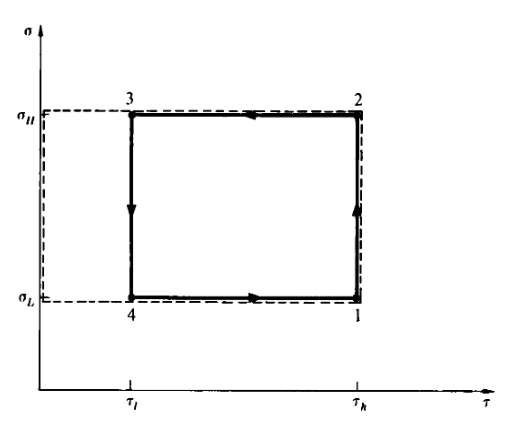


# Field Theory

Vand de Waals system:
$$
F_{\text{ideal}} = 
- N \tau \left[ \ln \left(\frac{n_Q V}{N} \right) +1 \right]  \\
\downarrow \\
$$

Mean field: $\langle n(\vec r) \rangle = \frac{N}{V}$ so replace $n(\vec r)$ with $N/V$.

Single particle interaction energy
$$
U_i \simeq \frac{N}{V} \int \phi (\vec r) dV = \frac{N}{V} (-2a)
\\
\Delta U = -\frac{N^2 a}{V}
$$
The $2$ disappears to prevent double counting

$$
F_{\text{VdW}} = - N \tau \left[ \ln \left(\frac{n_Q(V - Nb)}{N} \right) +1 \right]   - \frac{N^2a}{V}
$$

Some phyiscs

$$
p = - \frac{dF}{dV}_{\tau,N} = \frac{N\tau}{V-Nb} - \frac{N^2 a}{V^2}
$$